In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('data/airline_sentiment_analysis_processed.csv')

In [22]:
df.airline_sentiment.value_counts(normalize=True)

negative    0.795252
positive    0.204748
Name: airline_sentiment, dtype: float64

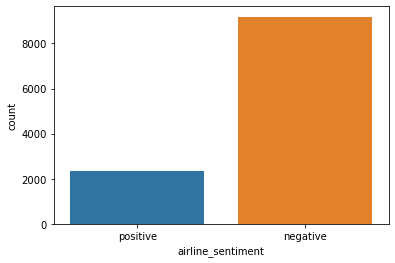

In [19]:
fig = sb.countplot(df.airline_sentiment).get_figure()
fig.savefig('count.png')

In [46]:
from data import balance_data, clean_sentence
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
df = pd.read_csv('data/airline_sentiment_analysis_processed.csv')
df.reset_index(drop=True, inplace=True)
df['text'] = df['text'].apply(clean_sentence)
df_train, df_valid = train_test_split(df, test_size=0.3, random_state=5)
df_train.reset_index(inplace=True)
df_train = balance_data(df_train, 'over')

In [68]:
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=3)

In [69]:
df_train.sentiment.value_counts()

1    6530
0    6364
Name: sentiment, dtype: int64

In [79]:
count_vec = CountVectorizer()
text = count_vec.fit_transform(df_train.text).toarray()
valid_text = count_vec.transform(df_valid.text).toarray()

In [80]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(text, df_train.sentiment)

GaussianNB()

In [81]:
nb.score(text, df_train.sentiment)

0.9345431983868466

In [82]:
nb.score(valid_text, df_valid.sentiment)

0.7221259387637204

In [83]:
test_text = count_vec.transform(df_test.text).toarray()
nb.score(test_text, df_test.sentiment)

0.7390300230946882

In [84]:
train_pred = nb.predict(text)
valid_pred = nb.predict(valid_text)
test_pred = nb.predict(test_text)

In [89]:
from sklearn.metrics import classification_report

print(classification_report(df_train.sentiment, train_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8674    0.9290      6364
           1     0.8855    1.0000    0.9393      6530

    accuracy                         0.9345     12894
   macro avg     0.9428    0.9337    0.9341     12894
weighted avg     0.9420    0.9345    0.9342     12894



In [90]:
print(classification_report(df_test.sentiment, test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9157    0.7404    0.8188      1379
           1     0.4198    0.7337    0.5340       353

    accuracy                         0.7390      1732
   macro avg     0.6677    0.7371    0.6764      1732
weighted avg     0.8146    0.7390    0.7607      1732

